In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import io

In [2]:

def sql_query():

    server = 'MSI'
    database = 'src_data'
    username = 'INFA_role_2'
    password = 'abc123'
    conn_str = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

    query = """
    SELECT 
        ci.INDICATOR_CODE,
        ci.INDICATOR_NAME,
        co.Country_ID,
        co.Country_Code,
        co.Region,
        co.IncomeGroup,
        co.CountryName,
        fe.RECORDED_YEAR,
        fe.EMISSION
    FROM dbo.DIM_INDICATOR ci
    INNER JOIN dbo.FACT_CO_2_EMISSION fe ON ci.INDICATOR_ID = fe.INDICATOR_ID
    INNER JOIN dbo.DIM_COUNTRY co ON fe.COUNTRY_ID = co.Country_ID
    """

    conn = pyodbc.connect(conn_str)
    df = pd.read_sql(query, conn)
    conn.close()
    return df

In [3]:
def render_plot_1(df):
    grouped = df.groupby(["IncomeGroup", "RECORDED_YEAR"])["EMISSION"].mean().reset_index()
    pivot_table = grouped.pivot(index="RECORDED_YEAR", columns="IncomeGroup", values="EMISSION")

    fig, ax = plt.subplots(figsize=(10, 6))
    for income_group in pivot_table.columns:
        ax.plot(pivot_table.index, pivot_table[income_group], marker='o', label=income_group)
    
    ax.set_title("CO2 Emissions by Income Group (per Year)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Emissions (metric tons per capita)")
    ax.legend(title="Income Group")
    ax.grid(True)
    fig.tight_layout()

    output = io.BytesIO()
    plt.savefig(output, format='png')
    output.seek(0)
    plt.close(fig)
    chart_data = base64.b64encode(output.getvalue()).decode('utf-8')
    output.close()
    plt.close()
    return chart_data


In [4]:
df=sql_query()

C:\Users\mural\AppData\Local\Temp\ipykernel_14864\3026037158.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
print(df['IncomeGroup'].unique())

[None 'Low income' 'Lower middle income' 'Upper middle income'
 'High income']


In [6]:

pivot=grouped_sorted[['EMISSION','IncomeGroup','CountryName']].pivot_table(columns="IncomeGroup", values="EMISSION")

NameError: name 'grouped_sorted' is not defined

In [11]:
pivot.head()

NameError: name 'pivot' is not defined

['High income' 'Low income' 'Lower middle income' 'Upper middle income']


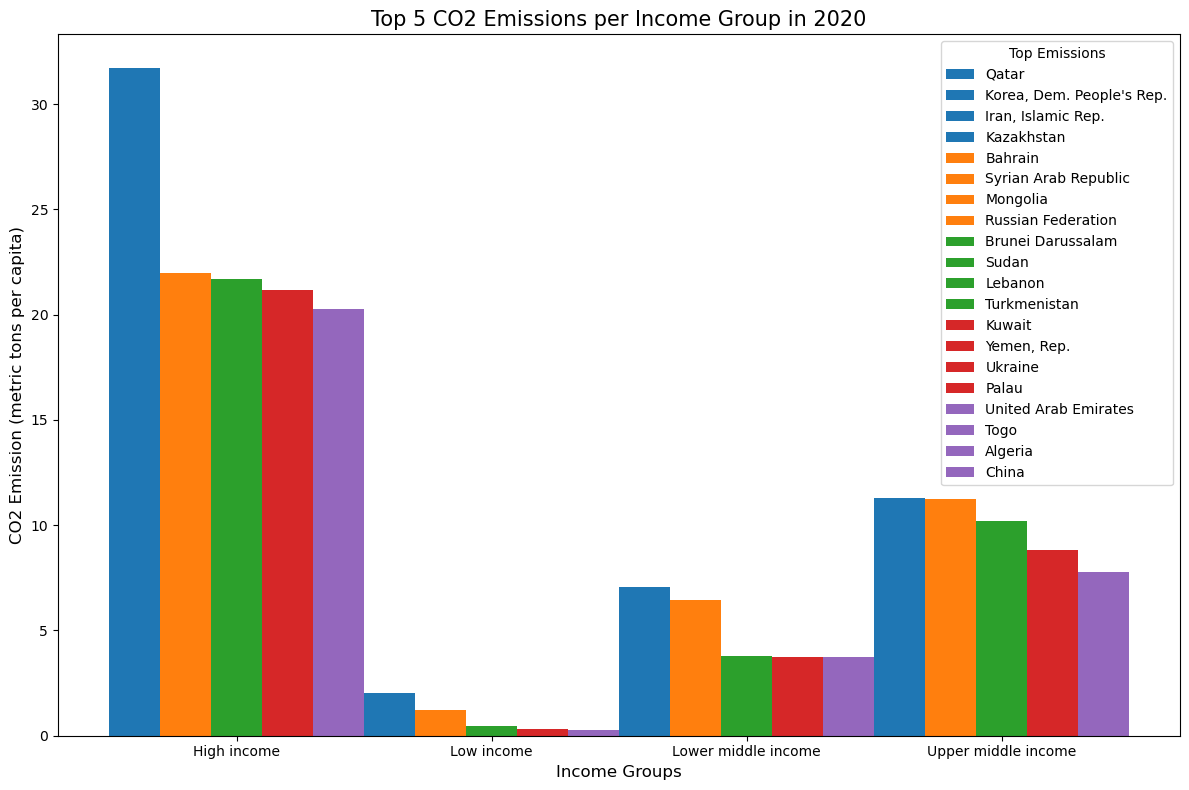

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter and group the data
top_emissions = (
    df[df["RECORDED_YEAR"] == 2020]
    .sort_values(by="EMISSION", ascending=False)
    .groupby("IncomeGroup")
    .head(5)
)

top_emissions = top_emissions.sort_values(by=["IncomeGroup", "EMISSION"], ascending=[True, False])

income_groups = top_emissions["IncomeGroup"].unique()
print(income_groups)
num_groups = len(income_groups)
bar_width = 0.2 
positions = np.arange(num_groups) 


fig, ax = plt.subplots(figsize=(12, 8))

for i in range(5):
    subset = top_emissions.groupby("IncomeGroup").nth(i).reset_index()
    ax.bar(
        positions + i * bar_width,  # Offset for each bar within the group
        subset["EMISSION"],
        bar_width,
        label=subset['CountryName'],
    )

ax.set_xlabel("Income Groups", fontsize=12)
ax.set_ylabel("CO2 Emission (metric tons per capita)", fontsize=12)
ax.set_title("Top 5 CO2 Emissions per Income Group in 2020", fontsize=15)
ax.set_xticks(positions + bar_width * 2)  
ax.set_xticklabels(income_groups, fontsize=10)
ax.legend(title="Top Emissions", loc="upper right")

plt.tight_layout()
plt.show()


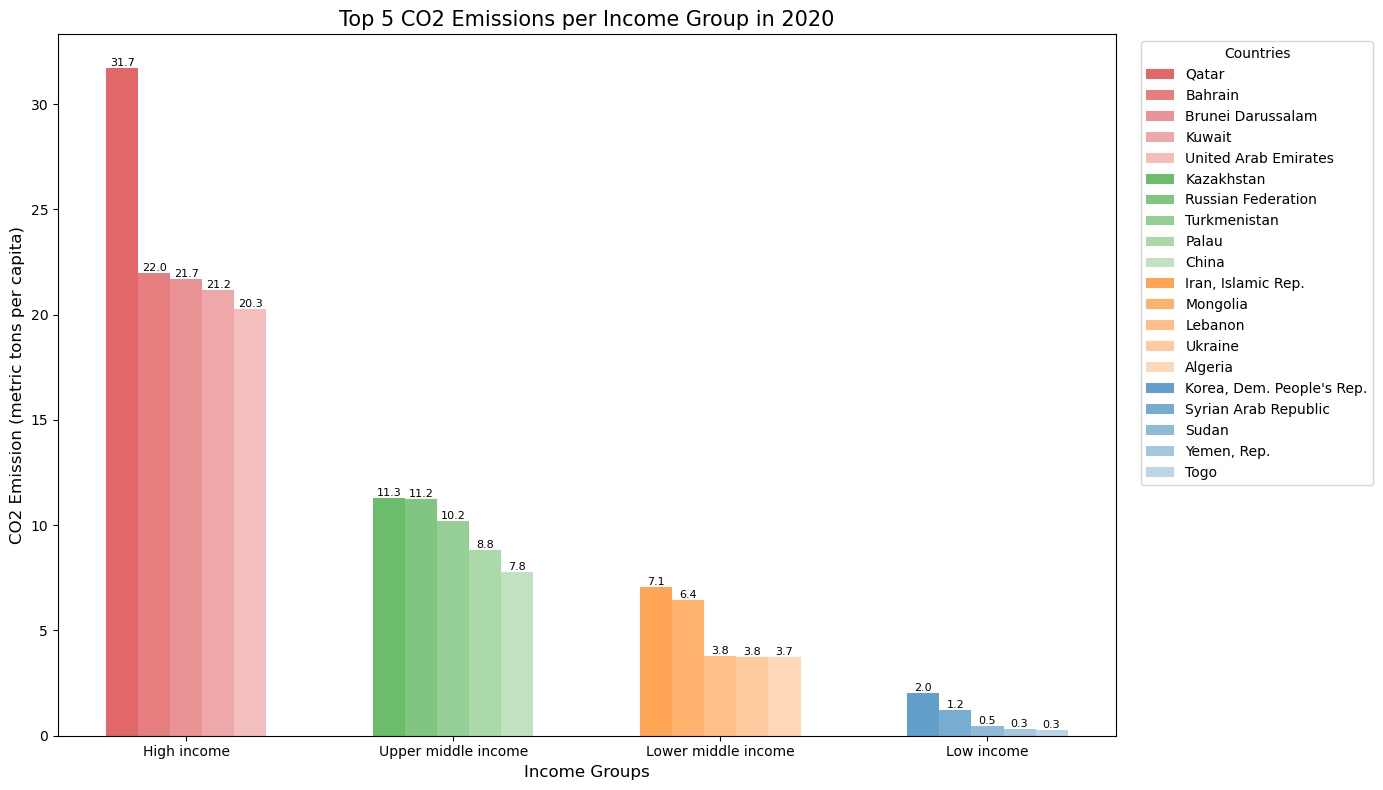

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

top_emissions = (
    df[df["RECORDED_YEAR"] == 2020]
    .sort_values(by="EMISSION", ascending=False)
    .groupby("IncomeGroup")
    .apply(lambda x: x.nlargest(5, "EMISSION"))
    .reset_index(drop=True)
)

income_groups = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']

fig, ax = plt.subplots(figsize=(14, 8))

num_groups = len(income_groups)
bar_width = 0.15 
group_spacing = 0.5 

income_group_colors = {
    'Low income': '#1F77B4',        
    'Lower middle income': '#FF7F0E',  
    'Upper middle income': '#2CA02C', 
    'High income': '#D62728'         
}

for i, income_group in enumerate(income_groups):
    group_data = top_emissions[top_emissions["IncomeGroup"] == income_group]
    for j, (_, row) in enumerate(group_data.iterrows()):
        x = i * (5 * bar_width + group_spacing) + j * bar_width
        
        ax.bar(
            x, 
            row["EMISSION"], 
            width=bar_width, 
            color=income_group_colors[income_group],
            alpha=0.7 - (j * 0.1), 
            label=f"{row['CountryName']}"
        )
        ax.text(
        x, 
        row["EMISSION"],  
        f'{row["EMISSION"]:.1f}',  
        ha='center',  
        va='bottom', 
        fontsize=8 )

ax.set_xlabel("Income Groups", fontsize=12)
ax.set_ylabel("CO2 Emission (metric tons per capita)", fontsize=12)
ax.set_title("Top 5 CO2 Emissions per Income Group in 2020", fontsize=15)

ax.set_xticks([i * (5 * bar_width + group_spacing) + 2 * bar_width for i in range(num_groups)])
ax.set_xticklabels(income_groups, fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Countries", loc="upper right", bbox_to_anchor=(1.25, 1), ncol=1)

plt.tight_layout()
plt.show()

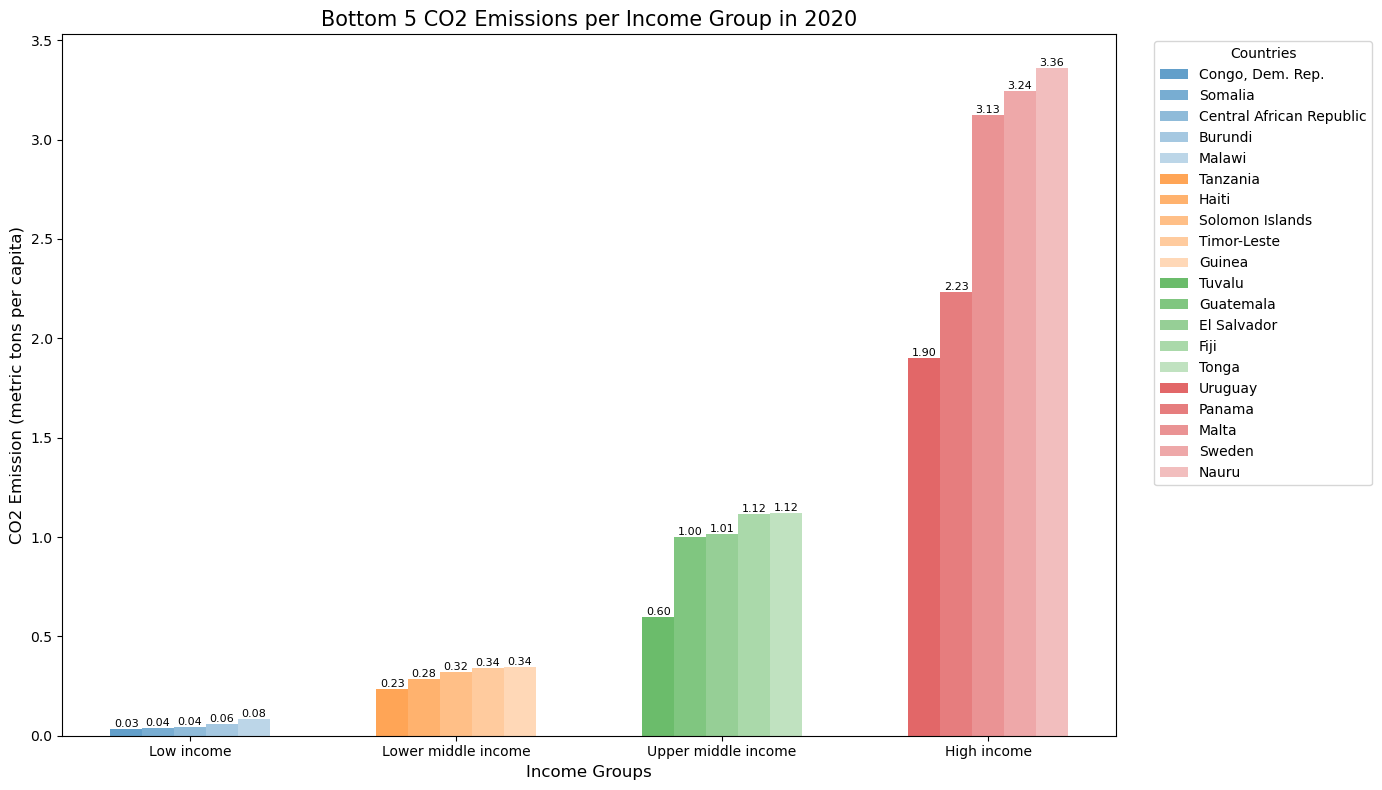

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

top_emissions = (
    df[df["RECORDED_YEAR"] == 2020]
    .sort_values(by="EMISSION", ascending=True)
    .groupby("IncomeGroup")
    .apply(lambda x: x.nsmallest(5, "EMISSION"))
    .reset_index(drop=True)
)

income_groups = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
income_groups.reverse()
fig, ax = plt.subplots(figsize=(14, 8))

num_groups = len(income_groups)
bar_width = 0.15 
group_spacing = 0.5 

income_group_colors = {
    'Low income': '#1F77B4',        
    'Lower middle income': '#FF7F0E',  
    'Upper middle income': '#2CA02C', 
    'High income': '#D62728'         
}

for i, income_group in enumerate(income_groups):
    group_data = top_emissions[top_emissions["IncomeGroup"] == income_group]
    for j, (_, row) in enumerate(group_data.iterrows()):
        x = i * (5 * bar_width + group_spacing) + j * bar_width
        
        ax.bar(
            x, 
            row["EMISSION"], 
            width=bar_width, 
            color=income_group_colors[income_group],
            alpha=0.7 - (j * 0.1), 
            label=f"{row['CountryName']}"
        )
        ax.text(
        x, 
        row["EMISSION"],  
        f'{row["EMISSION"]:.2f}',  
        ha='center',  
        va='bottom', 
        fontsize=8 )

ax.set_xlabel("Income Groups", fontsize=12)
ax.set_ylabel("CO2 Emission (metric tons per capita)", fontsize=12)
ax.set_title("Bottom 5 CO2 Emissions per Income Group in 2020", fontsize=15)

ax.set_xticks([i * (5 * bar_width + group_spacing) + 2 * bar_width for i in range(num_groups)])
ax.set_xticklabels(income_groups, fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Countries", loc="upper right", bbox_to_anchor=(1.25, 1), ncol=1)

plt.tight_layout()
plt.show()

In [ ]:
df['Region'].nunique()

7

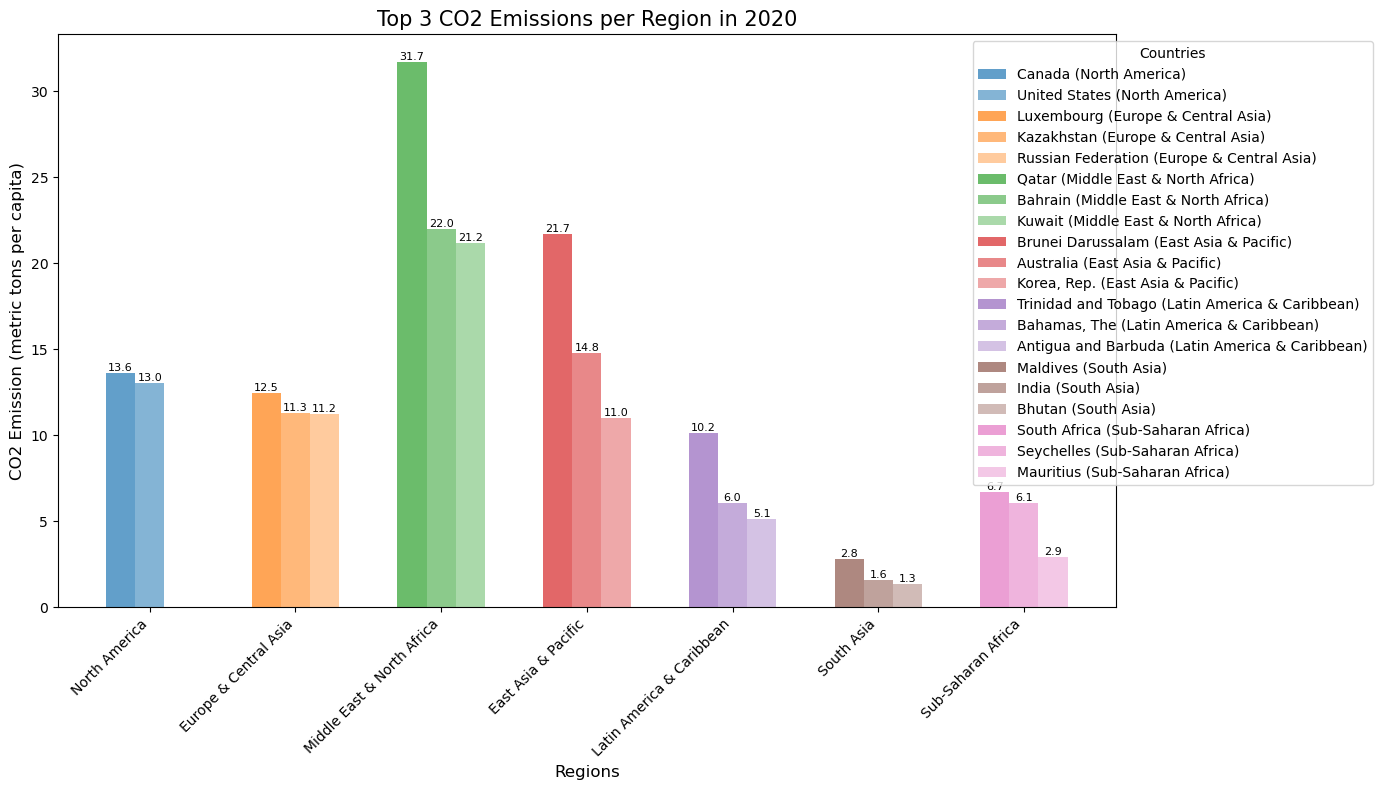

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

top_emissions = (
    df[df["RECORDED_YEAR"] == 2020]
    .sort_values(by="EMISSION", ascending=False)
    .groupby("Region")
    .apply(lambda x: x.nlargest(3, "EMISSION"))
    .reset_index(drop=True)
)

regions = ['North America', 'Europe & Central Asia', 'Middle East & North Africa', 
           'East Asia & Pacific', 'Latin America & Caribbean', 'South Asia', 
           'Sub-Saharan Africa']
fig, ax = plt.subplots(figsize=(14, 8))

num_groups = len(regions)
bar_width = 0.25  
group_spacing = 0.5 

region_colors = {
    'North America': '#1F77B4',         
    'Europe & Central Asia': '#FF7F0E', 
    'Middle East & North Africa': '#2CA02C',  
    'East Asia & Pacific': '#D62728',  
    'Latin America & Caribbean': '#9467BD', 
    'South Asia': '#8C564B',           
    'Sub-Saharan Africa': '#E377C2'     
}

for i, region in enumerate(regions):
    group_data = top_emissions[top_emissions["Region"] == region]
    
    for j, (_, row) in enumerate(group_data.iterrows()):
        x = i * (3 * bar_width + group_spacing) + j * bar_width
        
        ax.bar(
            x, 
            row["EMISSION"], 
            width=bar_width, 
            color=region_colors[region],
            alpha=0.7 - (j * 0.15),  
            label=f"{row['CountryName']} ({region})")
        ax.text(
        x, 
        row["EMISSION"],  
        f'{row["EMISSION"]:.1f}',  
        ha='center',  
        va='bottom', 
        fontsize=8 )

ax.set_xlabel("Regions", fontsize=12)
ax.set_ylabel("CO2 Emission (metric tons per capita)", fontsize=12)
ax.set_title("Top 3 CO2 Emissions per Region in 2020", fontsize=15)

ax.set_xticks([i * (3 * bar_width + group_spacing) + bar_width for i in range(num_groups)])
ax.set_xticklabels(regions, fontsize=10, rotation=45, ha='right')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Countries", loc="upper right", bbox_to_anchor=(1.25, 1), ncol=1)

plt.tight_layout()
plt.show()

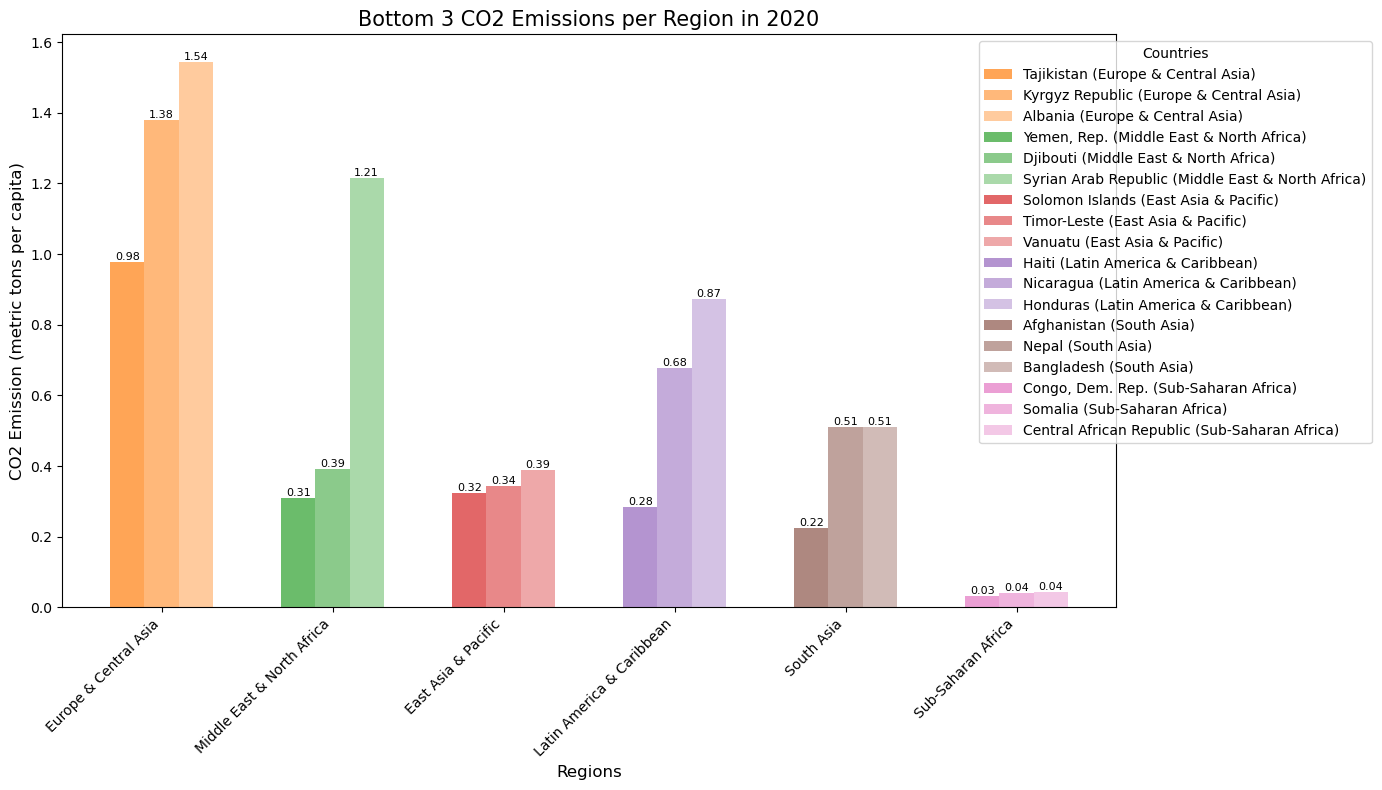

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

top_emissions = (
    df[df["RECORDED_YEAR"] == 2020]
    .sort_values(by="EMISSION", ascending=True)
    .groupby("Region")
    .apply(lambda x: x.nsmallest(3, "EMISSION"))
    .reset_index(drop=True)
)

regions = [ 'Europe & Central Asia', 'Middle East & North Africa', 
           'East Asia & Pacific', 'Latin America & Caribbean', 'South Asia', 
           'Sub-Saharan Africa']
fig, ax = plt.subplots(figsize=(14, 8))

num_groups = len(regions)
bar_width = 0.25  
group_spacing = 0.5 

region_colors = {
    'North America': '#1F77B4',         
    'Europe & Central Asia': '#FF7F0E', 
    'Middle East & North Africa': '#2CA02C',  
    'East Asia & Pacific': '#D62728',  
    'Latin America & Caribbean': '#9467BD', 
    'South Asia': '#8C564B',           
    'Sub-Saharan Africa': '#E377C2'     
}

for i, region in enumerate(regions):
    group_data = top_emissions[top_emissions["Region"] == region]
    
    for j, (_, row) in enumerate(group_data.iterrows()):
        x = i * (3 * bar_width + group_spacing) + j * bar_width
        
        ax.bar(
            x, 
            row["EMISSION"], 
            width=bar_width, 
            color=region_colors[region],
            alpha=0.7 - (j * 0.15),  
            label=f"{row['CountryName']} ({region})"
        )
        ax.text(
        x, 
        row["EMISSION"],  
        f'{row["EMISSION"]:.2f}',  
        ha='center',  
        va='bottom', 
        fontsize=8 )

ax.set_xlabel("Regions", fontsize=12)
ax.set_ylabel("CO2 Emission (metric tons per capita)", fontsize=12)
ax.set_title("Bottom 3 CO2 Emissions per Region in 2020", fontsize=15)

ax.set_xticks([i * (3 * bar_width + group_spacing) + bar_width for i in range(num_groups)])
ax.set_xticklabels(regions, fontsize=10, rotation=45, ha='right')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Countries", loc="upper right", bbox_to_anchor=(1.25, 1), ncol=1)

plt.tight_layout()
plt.show()

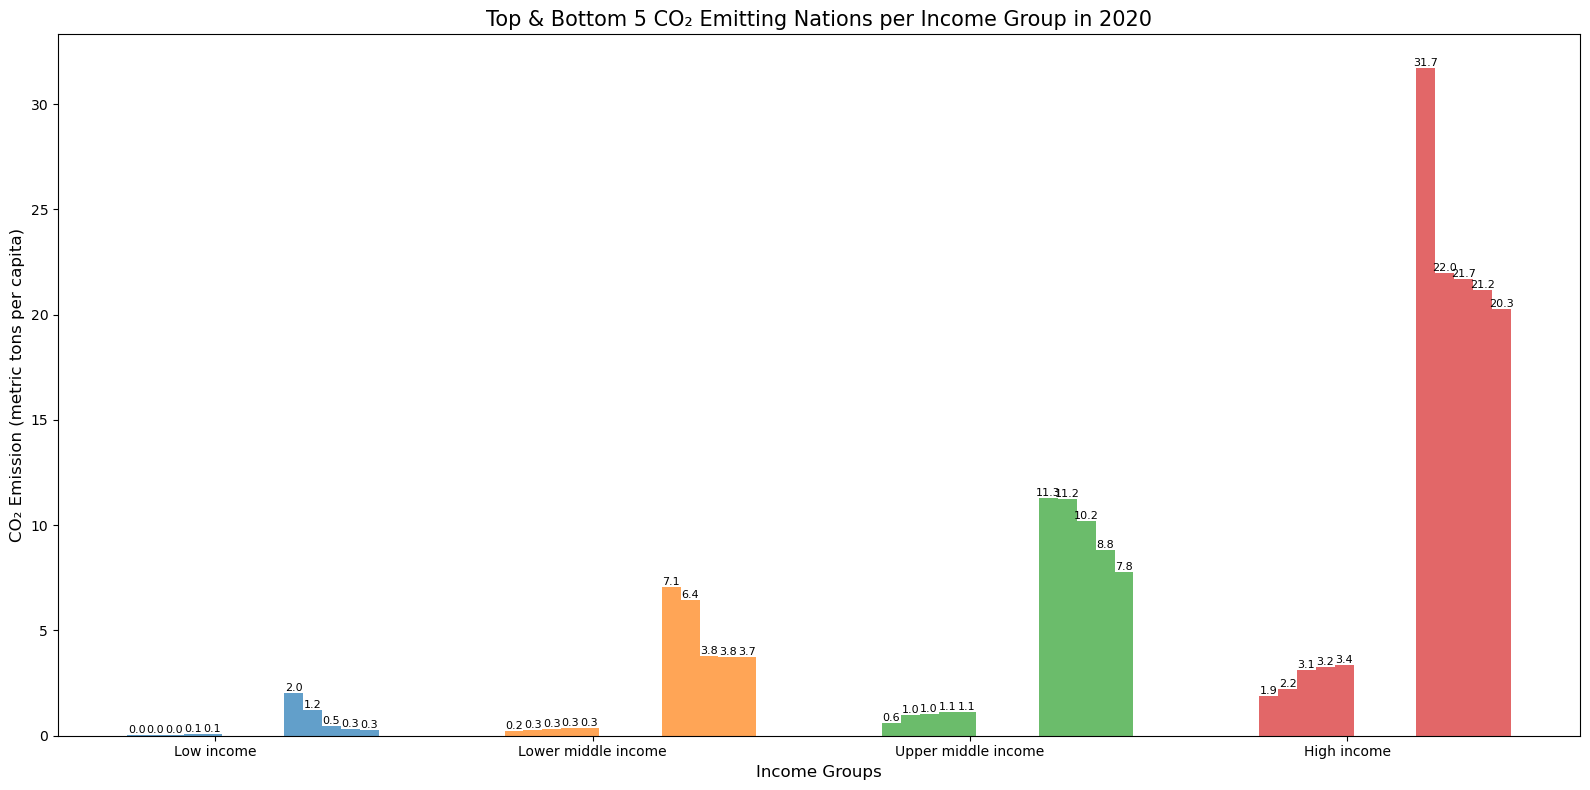

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Get top and bottom 5 emitters per income group
top_emissions = (
    df[df["RECORDED_YEAR"] == 2020]
    .sort_values(by="EMISSION", ascending=False)
    .groupby("IncomeGroup")
    .apply(lambda x: x.nlargest(5, "EMISSION"))
    .reset_index(drop=True)
)

bottom_emissions = (
    df[df["RECORDED_YEAR"] == 2020]
    .sort_values(by="EMISSION", ascending=True)
    .groupby("IncomeGroup")
    .apply(lambda x: x.nsmallest(5, "EMISSION"))
    .reset_index(drop=True)
)

income_groups = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
bar_width = 0.15  
group_spacing = 1.5  # Space between income groups
internal_spacing = 0.5  # Small space between bottom 5 and top 5

income_group_colors = {
    'Low income': '#1F77B4',
    'Lower middle income': '#FF7F0E',
    'Upper middle income': '#2CA02C',
    'High income': '#D62728'
}

fig, ax = plt.subplots(figsize=(16, 8))

for i, income_group in enumerate(income_groups):
    group_top = top_emissions[top_emissions["IncomeGroup"] == income_group]
    group_bottom = bottom_emissions[bottom_emissions["IncomeGroup"] == income_group]

    base_x = i * (10 * bar_width + group_spacing)  # Starting position for the group

    for j, (_, row) in enumerate(group_bottom.iterrows()):
        x = base_x + j * bar_width
        ax.bar(x, row["EMISSION"], width=bar_width, color=income_group_colors[income_group], alpha=0.7)
        ax.text(x, row["EMISSION"], f'{row["EMISSION"]:.1f}', ha='center', va='bottom', fontsize=8)

    base_x += 5 * bar_width + internal_spacing  # Add space before top 5

    for j, (_, row) in enumerate(group_top.iterrows()):
        x = base_x + j * bar_width
        ax.bar(x, row["EMISSION"], width=bar_width, color=income_group_colors[income_group], alpha=0.7)
        ax.text(x, row["EMISSION"], f'{row["EMISSION"]:.1f}', ha='center', va='bottom', fontsize=8)

ax.set_xlabel("Income Groups", fontsize=12)
ax.set_ylabel("CO₂ Emission (metric tons per capita)", fontsize=12)
ax.set_title("Top & Bottom 5 CO₂ Emitting Nations per Income Group in 2020", fontsize=15)

xtick_positions = [(i * (10 * bar_width + group_spacing)) + 2.5 * bar_width + internal_spacing / 2 for i in range(len(income_groups))]
ax.set_xticks(xtick_positions)
ax.set_xticklabels(income_groups, fontsize=10)

plt.tight_layout()
plt.show()
